In [22]:
import pandas as pd
import nltk
import re
import numpy as np
from textblob import TextBlob
# emails = pd.read_csv("../../hillary_emails.csv")

In [5]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'[a-z]+') # or just '\w+, this dumps numbers too
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    return " ".join(filtered_words)

emails.testBody = emails.ExtractedBodyText.apply(lambda x: str(x)).apply(lambda x: preprocess(x))

In [7]:
emails.testBody

0                                                     nan
1       b thursday march pm h latest syria aiding qadd...
2                                                     thx
3                                                     nan
4       h hrod clintonemail com friday march pm huma a...
5       pis print h hrod clintonernailcom wednesday se...
6                                                     nan
7       h hrod clintonemail corn friday march pm huma ...
8                                                     fyi
9       b wednesday september pm fwd libya libya sept ...
10                                                  fyi b
11      b wednesday september pm fwd libya libya sept ...
12                                                    fyi
13      anne marie slaughter sunday march pm jacob mil...
14      randolph lawrence m sent wednesday september p...
15      asked attend svtc today embassy tripoli first ...
16                           hope see picture kamala sent
17            

In [9]:
from textblob import TextBlob
tags_test = []
for x in range(10):
    tags_test.append(TextBlob(emails.testBody[x]).tags)

[[('nan', u'NN')],
 [('b', u'NN'),
  ('thursday', u'NN'),
  ('march', u'NN'),
  ('pm', u'NN'),
  ('h', u'NN'),
  ('latest', u'JJS'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('qaddafi', u'JJ'),
  ('sid', u'NN'),
  ('hrc', u'NN'),
  ('memo', u'NN'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('libya', u'JJ'),
  ('docx', u'NN'),
  ('hrc', u'NN'),
  ('memo', u'NN'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('libya', u'JJ'),
  ('docx', u'JJ'),
  ('march', u'NN'),
  ('hillary', u'NN')],
 [('thx', u'NN')],
 [('nan', u'NN')],
 [('h', u'NN'),
  ('hrod', u'NN'),
  ('clintonemail', u'NN'),
  ('com', u'NN'),
  ('friday', u'JJ'),
  ('march', u'NN'),
  ('pm', u'NN'),
  ('huma', u'NN'),
  ('abedin', u'NN'),
  ('fw', u'NN'),
  ('h', u'NN'),
  ('latest', u'JJS'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('qaddafi', u'JJ'),
  ('sid', u'NN'),
  ('hrc', u'NN'),
  ('memo', u'NN'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('libya', u'JJ'),
  ('docx', u'NN'),
  ('pis', u'NN'),
  ('print', u'NN'

In [38]:
type(emails.ExtractedBodyText[1]) == str

True

In [130]:
# Floats cant be put through textblob, must convert to str (hashed line doesnt' work)
type(emails.ExtractedBodyText[0])
# blob = TextBlob(emails.ExtractedBodyText[0])
blob = TextBlob(str(emails.ExtractedBodyText[0]))
blob

TextBlob("nan")

In [127]:
# Some strings have weird unicode, must decode first
type(emails.ExtractedBodyText[5])
blob = TextBlob(emails.ExtractedBodyText[5].decode('utf-8'))
blob

TextBlob("Pis print.
-•-...-^
H < hrod17@clintonernailcom>
Wednesday, September 12, 2012 2:11 PM
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
From [meat)
Sent: Wednesday, September 12, 2012 01:00 PM
To: 11
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-
deadly-riots/
Sent from my Verizon Wireless 4G LTE DROID
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739559
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045251")

In [31]:
# Test how word_counts works
test = []
test.append(TextBlob(emails.ExtractedBodyText[1]).word_counts)
test.append(TextBlob(emails.ExtractedBodyText[2]).word_counts)
test

[defaultdict(int,
             {u'030311.docx': 2,
              u'2011': 2,
              u'3': 2,
              u'9:45': 1,
              u'aiding': 3,
              u'and': 1,
              u'b6': 1,
              u'for': 1,
              u'h': 1,
              u'hillary': 1,
              u'how': 1,
              u'hrc': 2,
              u'is': 1,
              u'latest': 1,
              u'libya': 2,
              u'march': 2,
              u'memo': 2,
              u'more': 1,
              u'pm': 1,
              u'qaddafi': 1,
              u'sid': 1,
              u'syria': 3,
              u'thursday': 1}),
 defaultdict(int, {u'thx': 1})]

In [32]:
# make blobs and sentiments
blobs = []
sentiments = []
count_dict = []
for x in range(len(emails.ExtractedBodyText)):
    if type(emails.ExtractedBodyText[x]) != float:
        content = emails.ExtractedBodyText[x].decode('utf-8')
    else:
        content = str(emails.ExtractedBodyText[x])
    blob = TextBlob(content)
    blobs.append(blob)
    count_dict.append(blob.word_counts)
    sentiments.append(blob.sentiment.polarity)

In [34]:
# add sentiment and blob columns
emails['sentiments'] = sentiments
emails['blobs'] = blobs
emails['count_dict'] = count_dict

In [39]:
# test column
emails.blobs[0]

TextBlob("nan")

In [38]:
# test blob function in column
emails.blobs[0].tags

[('nan', u'NN')]

In [37]:
# test count_dict column
emails.count_dict[0]

defaultdict(int, {u'nan': 1})

In [40]:
emails.to_csv('emails_sentiment.csv')

In [3]:
emails = pd.read_csv('emails_sentiment.csv')

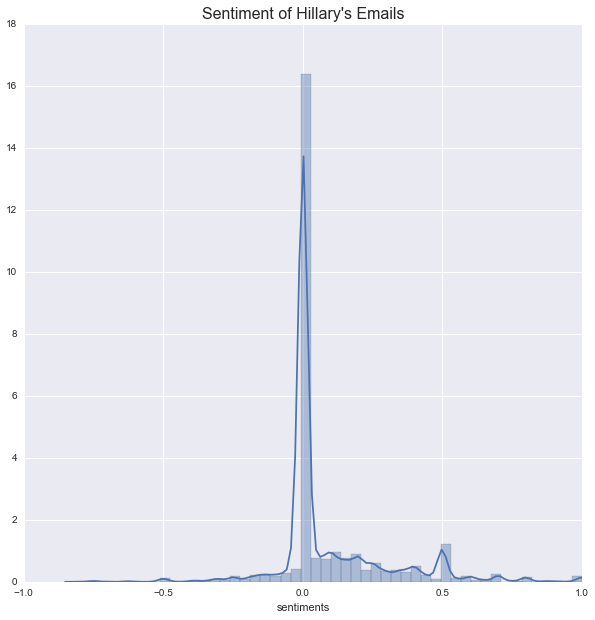

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))

sns.distplot(emails.sentiments)
plt.xlim(-1,1)
plt.title('Sentiment of Hillary\'s Emails', fontsize = 16)

In [8]:
# Emails that don't have sentiment = 0
len(emails[(emails.sentiments > 0) | (emails.sentiments < 0)])

3375

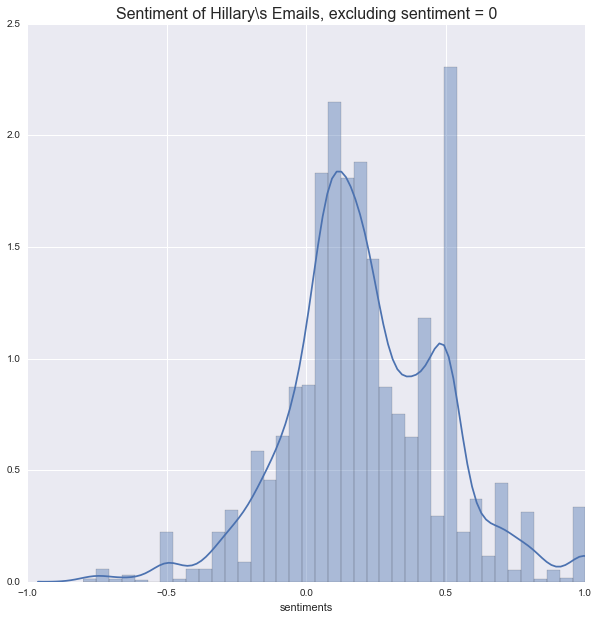

In [9]:
plt.figure(figsize=(10, 10))

sns.distplot(emails[(emails.sentiments > 0) | (emails.sentiments < 0)].sentiments)
plt.xlim(-1,1)
plt.title('Sentiment of Hillary\s Emails, excluding sentiment = 0', fontsize = 16)